In [1]:
import numpy as np
import matplotlib.pyplot as plt
def g(RD):
    return 1 / np.sqrt(1 + 3*(RD**2) / (np.pi**2))

def g_deriv(RD):
    return -3*np.pi*RD/(np.sqrt((3*RD**2 + np.pi**2)**3))
'''
X = np.arange(50, 350, 0.1)
Y = g(X)

Y_deriv = g_deriv(X)
#plt.plot(X, Y)
#plt.plot(X, Y_deriv)
#plt.show()

hema_calculated_rating = 1393.3
hema_calculated_RD = 90.12713

hema_showed_enemy_ratings = np.array([1425.3, 1242.2, 1355.1, 1500, 1048.7, 1263.7, 1935])
real_enemy_RDs = np.array([155.282, 114.5564, 137.8928, 350, 164.419, 122.2674, 78.03616])
#win = 1, lose = 0, draw = 0.5
scores = [0, 1, 1, 1, 1, 1, 0]

#Starting values for the fencer
hema_showed_rating_prior_month= 1264.2
real_RD = 106.3504
real_rating = hema_showed_rating_prior_month + 2*real_RD
volatility = 0.06



The rating displayed on hema ratings is not the actual one. The guys use the following formula: 
hema_showed_rating = real_rating - 2 * RD
this is because the hema_showed_rating has a 97.5% chance to be the exact rating according to the guys that created the website


def map_to_real_ratings(hema_showed_rating, real_enemy_RDs):
    return hema_showed_rating + real_enemy_RDs*2



constant = 173.7178

real_enemy_ratings = map_to_real_ratings(hema_showed_enemy_ratings, real_enemy_RDs)

#Mapping real values to the ones used in the algorithm
rating = (real_rating - 1500) / constant
RD = real_RD / constant

ratings = (real_enemy_ratings - 1500)/constant
enemy_RDs = real_enemy_RDs/constant

#The Algorithm starts here, for more check their documentation: http://www.glicko.net/glicko/glicko2.pdf
#***********************************************************************************************************************
v = 0
for i in range(len(ratings)):
    v += (g(enemy_RDs[i])**2)*E(rating, ratings[i], enemy_RDs[i])*(1 - E(rating, ratings[i], enemy_RDs[i]))

v = 1/v

'''
def E(rating, rating_j, RD_j):
    return 1 / (1 + np.exp(-g(RD_j)*(rating-rating_j)))



In [2]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

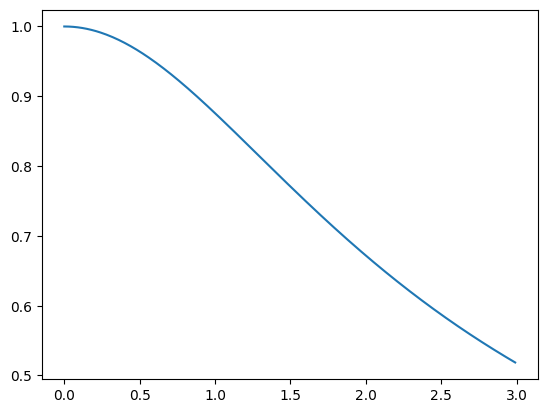

In [3]:
X = np.arange(0, 3, 0.01)
Y = g(X)

plt.plot(X, Y)

plt.show()

In [33]:


n_sims = 10000
matches = 20
volatility = 0.06
X = np.arange(0, n_sims, 1)
Y = np.zeros((X.shape))
deltas = np.zeros((X.shape))
sim_RD = np.zeros((X.shape))
sim_rating = np.zeros((X.shape))
for j in range(len(X)):
    #enemy_RDs = np.random.normal(150, 50, matches)/173.7178
    #ratings = (np.random.normal(1300, 200, matches)-1500)/173.7178
    enemy_RDs = np.random.uniform(50, 250, matches)/173.7178
    ratings = (np.random.uniform(700, 2000, matches)-1500)/173.7178
    scores = np.random.binomial(1, 0.8, matches)
    #rating = (np.random.normal(1300, 200, 1)-1500)/173.7178
    #RD = np.random.normal(150, 50, 1)/173.7178
    rating = 0
    RD = 350/173.7178
    for i in range(len(ratings)):
        Y[j] += (g(enemy_RDs[i]) ** 2) * E(rating, ratings[i], enemy_RDs[i]) * (1 - E(rating, ratings[i], enemy_RDs[i]))
    Y[j] = 1/Y[j]
    for i in range(len(ratings)):
        deltas[j] += g(enemy_RDs[i])*(scores[i] - E(rating, ratings[i], enemy_RDs[i]))
    deltas[j] *= Y[j]
    sim_RD[j] = np.sqrt(RD**2 + volatility**2)
    sim_RD[j] = 1 / np.sqrt(1/(sim_RD[j]**2) + 1/Y[j])
    sum = 0
    for i in range(matches):
        sum += g(enemy_RDs[i])*(scores[i] - E(rating, ratings[i], enemy_RDs[i]))
    sim_rating[j] = rating + sim_RD[j]**2*sum
    if j % 1000 == 0:
        print(j)
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [4]:
def g(RD):
    return 1 / np.sqrt(1 + 3*(RD**2) / (np.pi**2))

def g_deriv(RD):
    return -3*np.pi*RD/(np.sqrt((3*RD**2 + np.pi**2)**3))

def E(rating, rating_j, RD_j):
    return 1 / (1 + np.exp(-g(RD_j)*(rating-rating_j)))

def calc_rating_RD(real_rating, real_RD, real_enemy_ratings, real_enemy_RDs, scores):
    volatility = 0.06
    constant = 173.7178
    rating = (real_rating - 1500) / constant
    RD = real_RD / constant
    enemy_ratings = (real_enemy_ratings - 1500) / constant
    enemy_RDs = real_enemy_RDs / constant
    #STEP 3, compute v
    v = 0
    for i in range(len(enemy_ratings)):
        v += (g(enemy_RDs[i]) ** 2) * E(rating, enemy_ratings[i], enemy_RDs[i]) * (1 - E(rating, enemy_ratings[i], enemy_RDs[i]))
    v = 1/v
    
    #STEP 4 compute delta
    delta = 0
    for i in range(len(enemy_ratings)):
        delta += g(enemy_RDs[i])*(scores[i] - E(rating, enemy_ratings[i], enemy_RDs[i]))
    delta *= v
    
    #STEP 6 compute new RD
    sim_RD = np.sqrt(RD**2 + volatility**2)
    
    #STEP 7 compute new RD and rating
    sim_RD = 1 / np.sqrt(1/(sim_RD**2) + 1/v)
    sum = 0
    for i in range(len(enemy_ratings)):
        sum += g(enemy_RDs[i])*(scores[i] - E(rating, enemy_ratings[i], enemy_RDs[i]))
    sim_rating = rating + sim_RD**2*sum
        
    final_rating = constant * sim_rating + 1500
    final_RD = constant * sim_RD
    return(final_rating, final_RD)

In [5]:
#Fights that Vlad Manea had in June
hema_showed_enemy_ratings = np.array([1441, 1036.6, 1263.7])
real_enemy_RDs = np.array([134.7686, 143.2615, 122.2674])
real_hema_rating_enemies = hema_showed_enemy_ratings + 2*real_enemy_RDs

#win = 1, lose = 0, draw = 0.5
scores = [0.5, 0, 0]
#Starting values for a fencer that has never played before
real_rating = 1500
real_RD = 350
volatility = 0.06

In [14]:
matches = 50
hema_showed_enemy_ratings = np.random.normal(1300, 200, matches)
real_enemy_RDs = np.random.normal(150, 50, matches)
real_hema_rating_enemies = hema_showed_enemy_ratings + 2*real_enemy_RDs

#win = 1, lose = 0, draw = 0.5
score_chances = sigmoid((real_rating - real_hema_rating_enemies) / 300)
scores = np.array(np.random.binomial(1, score_chances, matches), dtype="float")
for i in range(len(scores)):
    sig = sigmoid((np.abs(real_rating - real_hema_rating_enemies[i])) / 300)
    if  sig <= 0.55 and sig >= 0.45:
        draw = np.random.binomial(1, 0.8, 1)
        if draw == 1:
            scores[i] = 0.5
#Starting values for a fencer that has never played before
real_rating = 1500
real_RD = 350
volatility = 0.06

In [15]:
print(score_chances)

[0.34495452 0.49235156 0.22048017 0.36465698 0.27620524 0.29999733
 0.1786681  0.59642772 0.64944941 0.49544038 0.34813728 0.35958794
 0.36893542 0.44898227 0.52395758 0.34888957 0.31728    0.55490374
 0.29847187 0.26626253 0.63084631 0.53636185 0.19139736 0.6305754
 0.26426613 0.12734961 0.16217707 0.60602852 0.34538585 0.35339272
 0.47170755 0.46558684 0.22214279 0.39719879 0.28878855 0.47862026
 0.24716545 0.73207825 0.34803339 0.18095392 0.27790209 0.46029981
 0.64722204 0.35406287 0.39109828 0.23898226 0.35000732 0.25825932
 0.6670505  0.3528877 ]


In [11]:
print(real_hema_rating_enemies)
print(real_rating)
print((real_rating - real_hema_rating_enemies) / 300)
print(score_chances)
print(scores)

[1392.50262954 1751.24557242 1475.83333469 1469.1220653  1474.92259399
 1717.65386239 1289.1691709  1598.68962179 1532.88155287 1631.66585083
 1756.94865193 1847.70420069 1940.2564228  2051.35741074 1009.71285788
 1943.15410527 1781.07683896 1686.93864187 1428.38023402 1724.0841352
 1619.18795431 1621.8749558  1409.29115143 2103.95851161 1685.06217264
 1229.25957261 1619.85065108 1915.5533308  1397.56828292 1358.77070332
 1422.99840452 1355.66449873 1173.69006612 1528.00035363 1641.9473156
 1514.92537469 1865.45201069 1442.84990766 1377.40333083 1905.18234306
 1805.3160703  1770.50974909 1566.59820927 1521.21787583 1363.47677044
 1964.8171833  1523.70730694 1873.48180728 1570.41121763 1318.70243284]
1500
[ 0.35832457 -0.83748524  0.08055555  0.10292645  0.08359135 -0.72551287
  0.70276943 -0.32896541 -0.10960518 -0.43888617 -0.85649551 -1.159014
 -1.46752141 -1.83785804  1.63429047 -1.47718035 -0.9369228  -0.62312881
  0.23873255 -0.74694712 -0.39729318 -0.40624985  0.30236283 -2.01319

In [12]:
(new_rating, new_RD) = calc_rating_RD(real_rating, real_RD, real_hema_rating_enemies, real_enemy_RDs, scores)
print(new_rating)
print(new_RD)
print(new_rating - 2*new_RD)

1545.1714218203456
62.60599871323218
1419.9594243938811


In [13]:
current_rating = real_rating
current_RD = real_RD

my_ratings = [current_rating]
my_RDs = [current_RD]
for i in range(len(real_enemy_RDs)):
    enemy_rating = np.array([real_hema_rating_enemies[i]])
    enemy_rd = np.array([real_enemy_RDs[i]])
    score = np.array([scores[i]])
    (new_rating, new_RD) = calc_rating_RD(current_rating, current_RD, enemy_rating, enemy_rd, score)
    my_ratings.append(new_rating)
    my_RDs.append(new_RD)
    current_rating = new_rating
    current_RD = new_RD
print(current_rating)
print(current_RD)
print(current_rating - 2*current_RD)


1550.8148500944383
73.83821580627654
1403.1384184818853


In [19]:
train_data = []
train_answers = []
for i in range(matches):
    train_data.append([my_ratings[i], my_RDs[i], my_ratings[i + 1], my_RDs[i + 1], real_hema_rating_enemies[i], scores[i]])
    train_answers.append(real_enemy_RDs[i])
print(train_data)
print(train_answers)

[[1500, 350, 1461.246505968767, 317.0089502789465, 1994.200429514773, 0.0], [1461.246505968767, 317.0089502789465, 1602.2131303121218, 252.41070178189142, 1427.6189374648475, 1.0], [1602.2131303121218, 252.41070178189142, 1550.6627798759382, 211.84847511633265, 1448.4633538067847, 0.5], [1550.6627798759382, 211.84847511633265, 1725.7911957134365, 197.8879943779665, 1895.8752717008208, 1.0], [1725.7911957134365, 197.8879943779665, 1799.4953276141198, 176.0201175690079, 1690.470444481267, 1.0], [1799.4953276141198, 176.0201175690079, 1766.9901195636446, 167.12246082324185, 2029.8728565000933, 0.0], [1766.9901195636446, 167.12246082324185, 1645.2480948571865, 162.60283522415236, 1316.4671361130208, 0.0], [1645.2480948571865, 162.60283522415236, 1602.775916125635, 152.63484491361208, 1742.6458975836838, 0.0], [1602.775916125635, 152.63484491361208, 1620.787018144196, 146.1356091172358, 1295.7688276121507, 1.0], [1620.787018144196, 146.1356091172358, 1641.899540866759, 139.5988434817079, 13

In [24]:
import csv

with open('train_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['old_rating', 'old_RD', 'new_rating', 'new_RD', "enemy_rating", "score"])
    writer.writerows(train_data)

with open('train_answers.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['enemy_RD'])
    for answer in train_answers:
        writer.writerow([answer])
    
with open("train_data.txt", "w") as f:
    for data in train_data:
        f.write(f"{data}\n")

#open and read the file after the appending:
with open("train_answers.txt", "w") as f:
    for answer in train_answers:
        f.write(f"{answer}\n")

In [43]:
def g(RD):
    return 1 / np.sqrt(1 + 3*(RD**2) / (np.pi**2))

def g_deriv(RD):
    return -3*np.pi*RD/(np.sqrt((3*RD**2 + np.pi**2)**3))

def E(rating, rating_j, RD_j):
    return 1 / (1 + np.exp(-g(RD_j)*(rating-rating_j)))

def inversa(rating, real_RD, real_enemy_RD, score, real_new_rating, real_new_RD, volatility = 0.06):
    constant = 173.7178
    rating = (real_rating - 1500) / constant
    RD = real_RD / constant
    enemy_RD = real_enemy_RD / constant
    new_rating = (real_new_rating - 1500) / constant
    real_new_RD = real_new_RD / constant
    upper = 2*(new_rating - rating)*np.sqrt(RD**2 + volatility**2) * g(enemy_RD)
    print(upper)
    
    lower_sqrt = np.sqrt(np.abs((new_rating - rating) * np.sqrt(RD**2 + volatility**2) * (1 - 4 * (rating - new_rating + score*g(enemy_RD))) - 1))
    lower = 1 - (new_rating - rating) * np.sqrt(RD**2 + volatility**2) * g(enemy_RD) + lower_sqrt
    print(upper / lower - 1)
    return np.log(np.abs(upper / lower - 1)) / g(enemy_RD) + rating

In [44]:
enemy_rating = inversa(real_rating, real_RD, real_hema_rating_enemies[0], scores[0], current_rating, current_RD)
print(real_hema_rating_enemies[0])
print(173.7178 * enemy_rating + 1500)

-0.28093525920309104
-1.1530429609929242
1814.5595814870646
1644.59606797342


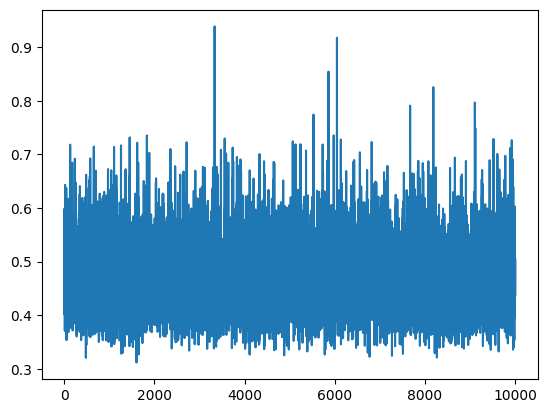

In [6]:

plt.plot(X, Y)
plt.show()

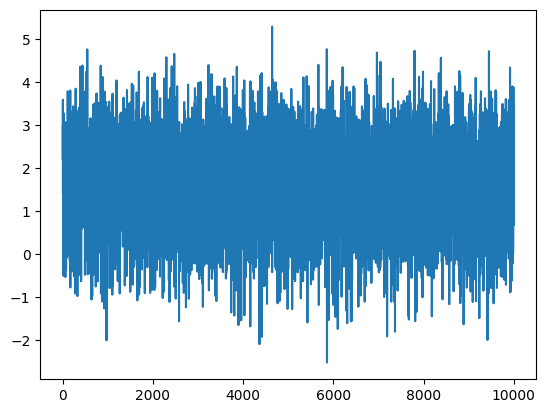

In [7]:
plt.plot(X, deltas)
plt.show()

In [34]:
import PyQt5
%matplotlib qt
fig, ax = plt.subplots()

ax.hist(Y, bins=100)

ax.set(xlim=(0.25, 0.75), xticks=np.linspace(0.25, 0.75, 9),
       ylim=(0, 500), yticks=np.linspace(0, 500, 11))
#plt.hist(Y, xlim=(0, 0.0010))
plt.title("Histogram of v over 10 000 simulations, uniform dist")
plt.xlabel("Value for v")
plt.show()

In [37]:
fig, ax = plt.subplots()

ax.hist(deltas, bins=100)

ax.set(xlim=(-3, 5), xticks=np.linspace(-3, 5, 7),
       ylim=(0, 500), yticks=np.linspace(0, 500, 11))
#plt.hist(Y, xlim=(0, 0.0010))
plt.title("Histogram of delta over 10 000 simulations, uniform dist")
plt.xlabel("Value for delta")
plt.show()

In [11]:
plt.plot(X, sim_RD)
plt.show()

In [12]:
plt.plot(X, sim_rating)
plt.show()

In [13]:
plt.plot(X, sim_rating*173.7178 + 1500)
plt.show()

In [30]:
fig, ax = plt.subplots()

ax.hist(sim_RD, bins=100)

ax.set(xlim=(0.4, 0.8), xticks=np.linspace(0.4, 0.8, 11),
       ylim=(0, 400), yticks=np.linspace(0, 400, 11))
#plt.hist(Y, xlim=(0, 0.0010))

plt.show()

In [38]:
fig, ax = plt.subplots()

ax.hist(sim_RD*173.7178, bins=100)

ax.set(xlim=(0, 250), xticks=np.linspace(0, 250, 12),
       ylim=(0, 400), yticks=np.linspace(0, 400, 11))
#plt.hist(Y, xlim=(0, 0.0010))
plt.title("Histogram of rating deviation over 10 000 simulations, uniform dist")
plt.xlabel("Value for rating deviation")
plt.show()

In [16]:
fig, ax = plt.subplots()

ax.hist(sim_rating, bins=100)

ax.set(xlim=(-15, 2.5), xticks=np.linspace(-15, 2.5, 8),
       ylim=(0, 600), yticks=np.linspace(0, 600, 11))
#plt.hist(Y, xlim=(0, 0.0010))

plt.show()

In [40]:
fig, ax = plt.subplots()

ax.hist(sim_rating*173.7178 + 1500, bins=100)

ax.set(xlim=(0, 2200), xticks=np.linspace(0, 2200, 16),
       ylim=(0, 600), yticks=np.linspace(0, 600, 11))
#plt.hist(Y, xlim=(0, 0.0010))
plt.title("Histogram of rating over 10 000 simulations, uniform dist")
plt.xlabel("Value for rating")
plt.show()

In [13]:
plt.hist(Y)
plt.show()

[0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0]


In [5]:
import csv
train_data = []
with open('train_data.csv', 'r') as file:
    r = csv.reader(file)
    i = 0
    for row in r:
        if i == 0:
            i = 1
            continue
        train_data.append(np.array([float(i) for i in row]))
train_data = np.array(train_data)    
train_answers = []
with open('train_answers.csv', 'r') as file:
    r = csv.reader(file)
    i = 0
    for row in r:
        if i == 0:
            i = 1
            continue
        train_answers.append(float(row[0]))
print(train_answers[0])
train_answers = np.array(train_answers)

173.91825162808686


In [6]:
print(train_data)

[[1.50000000e+03 3.50000000e+02 1.46124651e+03 3.17008950e+02
  1.99420043e+03 0.00000000e+00]
 [1.46124651e+03 3.17008950e+02 1.60221313e+03 2.52410702e+02
  1.42761894e+03 1.00000000e+00]
 [1.60221313e+03 2.52410702e+02 1.55066278e+03 2.11848475e+02
  1.44846335e+03 5.00000000e-01]
 ...
 [1.43848781e+03 6.89737854e+01 1.43639685e+03 6.94560036e+01
  1.93320622e+03 0.00000000e+00]
 [1.43639685e+03 6.94560036e+01 1.43277407e+03 6.97250483e+01
  1.79087987e+03 0.00000000e+00]
 [1.43277407e+03 6.97250483e+01 1.42799006e+03 6.97994255e+01
  1.71376172e+03 0.00000000e+00]]


In [7]:
print(train_answers)

[173.91825163 206.59171041  66.39775081 147.74036866 143.05926857
 281.57195136 168.9895404  221.9412574   41.498222   108.13636551
 179.42578662  99.60334261  96.19580376 183.39794366 210.22762342
 116.86567029  92.81875468  72.11373971 145.07874976 187.99289383
 200.43146662 143.74673037 112.34733131  89.92448987  77.16444683
 171.42341395 121.74955702 174.61528659 113.32044665 162.28160749
 168.48132558 169.73145571  53.46800395  75.94923814 134.13967115
 103.71129975 109.71024681 206.49053195  37.24655339 155.55844336
 156.60156827 130.34326468 176.49558533 128.92495814 178.27766056
 119.29997675  91.3356045   42.4481899  108.40259046 133.53498847
  79.86555951  74.04550741 197.25691769 171.15706418  90.44841875
 183.84622653  66.7396831   93.14839445 156.12070809 124.42995734
 121.83330635 140.04524834 145.30395352 321.28085134 152.85426861
 241.04685098 195.78558279 160.14338131 180.29561608 188.32627791
 103.55287069 156.61090495 234.05080196 113.36369528 131.32809909
  86.97658

In [8]:
import tensorflow as tf 
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1) 
])

In [9]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop 

optimizer = Adam(learning_rate=0.01)  

model.compile(optimizer=optimizer,
              loss='mean_absolute_error')

In [10]:
history = model.fit(train_data[0:800], train_answers[0:800],
          epochs=200)

Epoch 1/200
25/25 [==============================] - 2s 6ms/step - loss: 779.8699
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 151.5236
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 122.0324
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 102.6314
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 87.2452
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 71.8382
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 60.6080
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 51.8015
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 45.3759
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 40.6033
Epoch 11/200
25/25 [==============================] - 0s 1ms/step - loss: 38.5723
Epoch 12/200
25/25 [==============================] - 0s 1ms/step - loss: 38.1940
Epoch 13/200
25/25 [=

25/25 [==============================] - 0s 1ms/step - loss: 36.0771
Epoch 101/200
25/25 [==============================] - 0s 1ms/step - loss: 36.4843
Epoch 102/200
25/25 [==============================] - 0s 997us/step - loss: 35.3807
Epoch 103/200
25/25 [==============================] - 0s 1ms/step - loss: 35.8586
Epoch 104/200
25/25 [==============================] - 0s 1ms/step - loss: 35.7536
Epoch 105/200
25/25 [==============================] - 0s 1ms/step - loss: 35.2595
Epoch 106/200
25/25 [==============================] - 0s 1ms/step - loss: 35.4905
Epoch 107/200
25/25 [==============================] - 0s 1ms/step - loss: 35.6711
Epoch 108/200
25/25 [==============================] - 0s 1ms/step - loss: 35.7193
Epoch 109/200
25/25 [==============================] - 0s 997us/step - loss: 35.4929
Epoch 110/200
25/25 [==============================] - 0s 1ms/step - loss: 35.8081
Epoch 111/200
25/25 [==============================] - 0s 1ms/step - loss: 35.4606
Epoch 112/200


25/25 [==============================] - 0s 1ms/step - loss: 36.5504
Epoch 199/200
25/25 [==============================] - 0s 1ms/step - loss: 36.2522
Epoch 200/200
25/25 [==============================] - 0s 1ms/step - loss: 36.8734


25/25 [==============================] - 0s 1ms/step


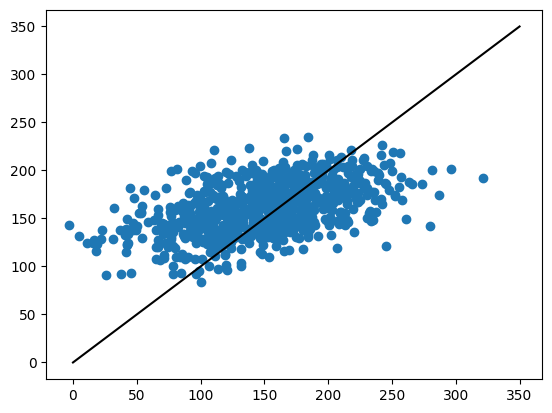

In [11]:
predictions_train = model.predict(train_data[0:800])
plt.scatter(train_answers[0:800], predictions_train, label='Data')
x = tf.linspace(0.0, 350, 351)
y = x
plt.plot(x, y, color='black')

In [12]:
test_loss = model.evaluate(train_data[800:1000], train_answers[800:1000], verbose=0) 
print('test loss', test_loss)


test loss 39.68058776855469


In [13]:
predictions = model.predict(train_data[800:1000])

7/7 [==============================] - 0s 1ms/step


Text(0, 0.5, 'Predicted enemy RD')

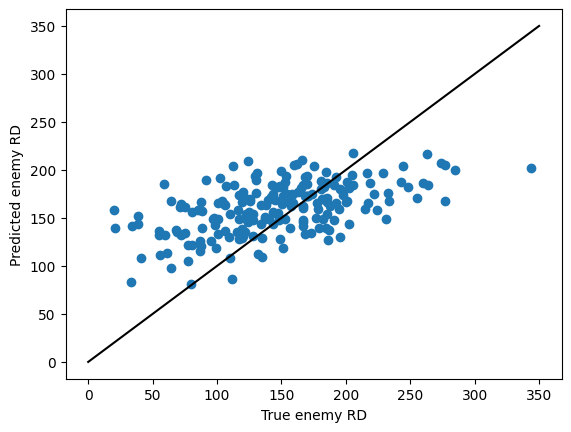

In [19]:
plt.scatter(train_answers[800:1000], predictions, label='Data')
x = tf.linspace(0.0, 350, 351)
y = x
plt.plot(x, y, color='black')
plt.xlabel("True enemy RD")
plt.ylabel("Predicted enemy RD")

In [15]:
difference = train_answers[800:1000] - predictions[0]

(array([ 7., 21., 32., 46., 44., 28., 12.,  8.,  1.,  1.]),
 array([-150.36110206, -118.02804772,  -85.69499338,  -53.36193904,
         -21.0288847 ,   11.30416964,   43.63722398,   75.97027832,
         108.30333266,  140.63638701,  172.96944135]),
 <BarContainer object of 10 artists>)

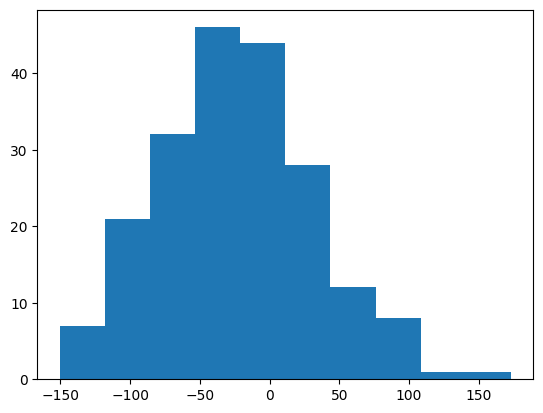

In [16]:
plt.hist(difference)

In [17]:
print(train_answers.shape)

(1000,)


In [18]:
print(np.mean(np.abs(difference)))

48.55988162145561
